In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet('./Data/draft0522.parquet')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6067 entries, 0 to 6066
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player                       6067 non-null   object 
 1   year                         6067 non-null   float64
 2   pos                          6067 non-null   object 
 3   school_name                  6067 non-null   object 
 4   height                       6038 non-null   float64
 5   weight                       6043 non-null   float64
 6   forty_yd                     5619 non-null   float64
 7   vertical                     4780 non-null   float64
 8   bench_reps                   4173 non-null   float64
 9   broad_jump                   4700 non-null   float64
 10  cone                         3819 non-null   float64
 11  shuttle                      3923 non-null   float64
 12  g_season                     4311 non-null   float64
 13  def_int_season    

In [5]:
df.Round[df.Round <= 3] = 1

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\4223153948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Round[df.Round <= 3] = 1


In [6]:
df.Round[df.Round != 1] = 0

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\3089005703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Round[df.Round != 1] = 0


In [7]:
df.Round.value_counts(normalize=True)

0.0    0.707763
1.0    0.292237
Name: Round, dtype: float64

In [8]:
df[df.pos == 'WR'].groupby(['Round']).mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1713061100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.pos == 'WR'].groupby(['Round']).mean()


,year,height,weight,forty_yd,vertical,bench_reps,broad_jump,cone,shuttle,g_season,...,tackles_solo_career,tackles_assists_career,tackles_total_career,tackles_loss_career,sacks_career,pass_defended_career,fumbles_forced_season,fumbles_forced_career,pick,Age
Round,,,,,,,,,,,,,,,,,,,,,
0.0,2013.838550,72.764511,201.888889,4.526424,34.833019,14.111111,120.357977,6.984306,4.262738,11.497186,...,81.666667,82.666667,164.333333,29.0,5.0,4.0,1.0,3.0,172.343284,22.440945
1.0,2013.516807,72.725738,202.843882,4.447568,36.266129,15.944444,123.280220,6.921061,4.217071,12.078341,...,95.000000,105.000000,200.000000,18.5,7.0,1.0,NaN,NaN,51.932773,21.965217


In [20]:
df['speed'] = (df.weight * 200) / (df.forty_yd ** 4)
df['agility'] = (df.weight * 200) / (df.shuttle ** 4)

In [27]:
combine = df[['player','college_conference','pos','Round','height','weight','speed','agility','vertical','bench_reps','broad_jump','forty_yd','cone','shuttle','Age']]

In [22]:
combine.groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\3341430684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine.groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,73.635980,240.335985,91.495238,127.702116,32.477388,20.147386,114.212149,4.788615,7.275026,4.420126,22.601182
1.0,74.157716,246.776145,99.821009,136.640225,33.672163,21.771523,117.143781,4.713309,7.216081,4.376118,22.207612


In [23]:
combine[combine.pos == 'QB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\3943618426.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'QB'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,74.581897,221.353448,82.213861,124.580080,30.719512,18.625,110.455882,4.829318,7.152245,4.355750,23.066667
1.0,75.326531,225.234694,88.005132,134.060199,31.760563,22.000,113.757143,4.774368,7.034688,4.292769,22.447917


In [24]:
combine[combine.pos == 'RB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\3685605720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'RB'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,70.199017,211.965686,97.668878,126.205530,33.963277,19.085174,117.749280,4.567577,7.084135,4.300212,22.317204
1.0,70.718750,216.609375,106.416123,135.664357,35.360360,20.580645,121.571429,4.494355,6.963043,4.233600,21.821138


In [25]:
combine[combine.pos == 'WR'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\2877891251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'WR'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,72.764511,201.888889,96.489479,123.461485,34.833019,14.111111,120.357977,4.526424,6.984306,4.262738,22.440945
1.0,72.725738,202.843882,103.831506,129.223810,36.266129,15.944444,123.280220,4.447568,6.921061,4.217071,21.965217


In [26]:
combine[combine.pos == 'TE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1251359511.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'TE'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,76.189873,251.924051,97.471924,135.860603,32.565574,19.817680,114.937853,4.776157,7.174841,4.399938,22.644628
1.0,76.604396,252.725275,105.909475,142.923596,34.410448,21.743243,118.830769,4.681667,7.120678,4.349000,22.277778


In [30]:
combine[combine.pos == 'OL'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\2880297968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'OL'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,76.571642,311.952310,81.224892,120.801486,27.290414,24.908046,101.597701,5.276752,7.844465,4.782703,22.805389
1.0,76.848185,313.676568,89.023617,131.509597,28.775000,26.176955,105.258475,5.164520,7.723864,4.686930,22.500000


In [31]:
combine[combine.pos == 'DT'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1432382243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DT'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,74.839662,306.764706,88.965164,131.539000,28.969613,26.906077,104.586207,5.134658,7.720506,4.661625,22.630769
1.0,74.955882,308.595588,95.581917,134.546036,29.407895,29.368932,105.935780,5.050821,7.649479,4.639697,22.367647


In [32]:
combine[combine.pos == 'DE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1567406051.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DE'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,75.615063,267.539749,96.499260,136.575055,32.364865,23.247423,113.194595,4.858609,7.342284,4.457012,22.65873
1.0,76.116438,269.369863,105.053192,145.433524,33.422131,24.471154,117.453782,4.764500,7.224717,4.403585,22.20979


In [33]:
combine[combine.pos == 'EDGE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\3572871084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'EDGE'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,75.292683,251.560976,100.768743,138.326844,33.854839,22.896552,117.645161,4.737576,7.188,4.372273,22.727273
1.0,75.916667,253.166667,113.688929,147.334700,35.026316,22.916667,122.789474,4.598235,7.062,4.310000,22.347826


In [34]:
combine[combine.pos == 'LB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\587442158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'LB'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,73.436853,239.142857,96.424089,137.921971,33.476562,21.916230,116.483544,4.727348,7.159900,4.328925,22.636000
1.0,73.876190,242.066667,105.574229,146.731371,35.404624,22.690789,120.304598,4.633520,7.075075,4.273066,22.246377


In [35]:
combine[combine.pos == 'CB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\580484838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'CB'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,71.166240,192.043478,93.052879,125.870020,35.529412,14.358108,121.404040,4.511297,6.952385,4.191630,22.458537
1.0,71.558559,194.747748,99.933313,135.329425,36.516854,15.449704,124.066667,4.446959,6.880362,4.130417,22.101382


In [36]:
combine[combine.pos == 'DB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1703419566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DB'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,71.318182,194.386364,89.228363,115.288998,35.715909,14.342105,123.309524,4.56975,7.066829,4.294524,21.923077
1.0,72.600000,198.133333,103.156264,115.934135,36.566667,14.600000,126.133333,4.43000,6.989000,4.312000,21.785714


In [37]:
combine[combine.pos == 'S'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\2438189165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'S'].groupby('Round').mean()


,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,
0.0,72.147335,206.796238,94.966823,129.779462,34.977528,17.042146,120.117424,4.574291,7.024051,4.23655,22.442424
1.0,72.377193,207.807018,102.417802,138.857501,36.717391,16.814815,123.636364,4.495149,6.909273,4.16875,22.063063


In [28]:
combine.groupby('college_conference').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\3304860561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine.groupby('college_conference').mean()


,Round,height,weight,speed,agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
college_conference,,,,,,,,,,,,
American Athletic Conference,0.447619,73.336538,229.590476,98.568315,131.582385,34.126437,18.960526,120.069767,4.641319,7.130469,4.338594,22.475728
Atlantic Coast Conference,0.467018,74.106101,244.989390,97.349998,131.976086,33.288333,21.366038,116.822148,4.737405,7.255841,4.405190,22.234043
Big East,0.590909,73.318182,240.318182,99.335767,136.320756,33.400000,23.333333,116.714286,4.689091,7.154815,4.346452,22.340909
Big Sky Conference,0.214286,74.642857,235.000000,99.500505,140.585017,33.576923,18.300000,117.923077,4.653571,7.035000,4.259091,22.714286
Big South Conference,0.000000,72.600000,215.600000,97.924385,126.906301,34.200000,18.200000,121.800000,4.578000,7.058000,4.292000,22.600000
Big Ten Conference,0.522727,74.272727,248.792929,98.073798,137.899050,33.478594,21.434629,116.610561,4.739595,7.237143,4.376573,22.250000
Big Twelve Conference,0.500000,73.853448,245.254310,98.286343,133.761370,33.583784,21.703030,117.108696,4.729009,7.253942,4.403586,22.436123
Central Intercollegiate Athletic Association,0.000000,75.000000,195.000000,92.612967,NaN,36.000000,NaN,124.000000,4.530000,NaN,NaN,22.000000
Colonial Athletic Association,0.300000,73.850000,244.750000,95.135846,132.269231,32.562500,19.466667,115.562500,4.770000,7.287333,4.392667,22.350000


C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1085805742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine.corr().abs(),annot=True);


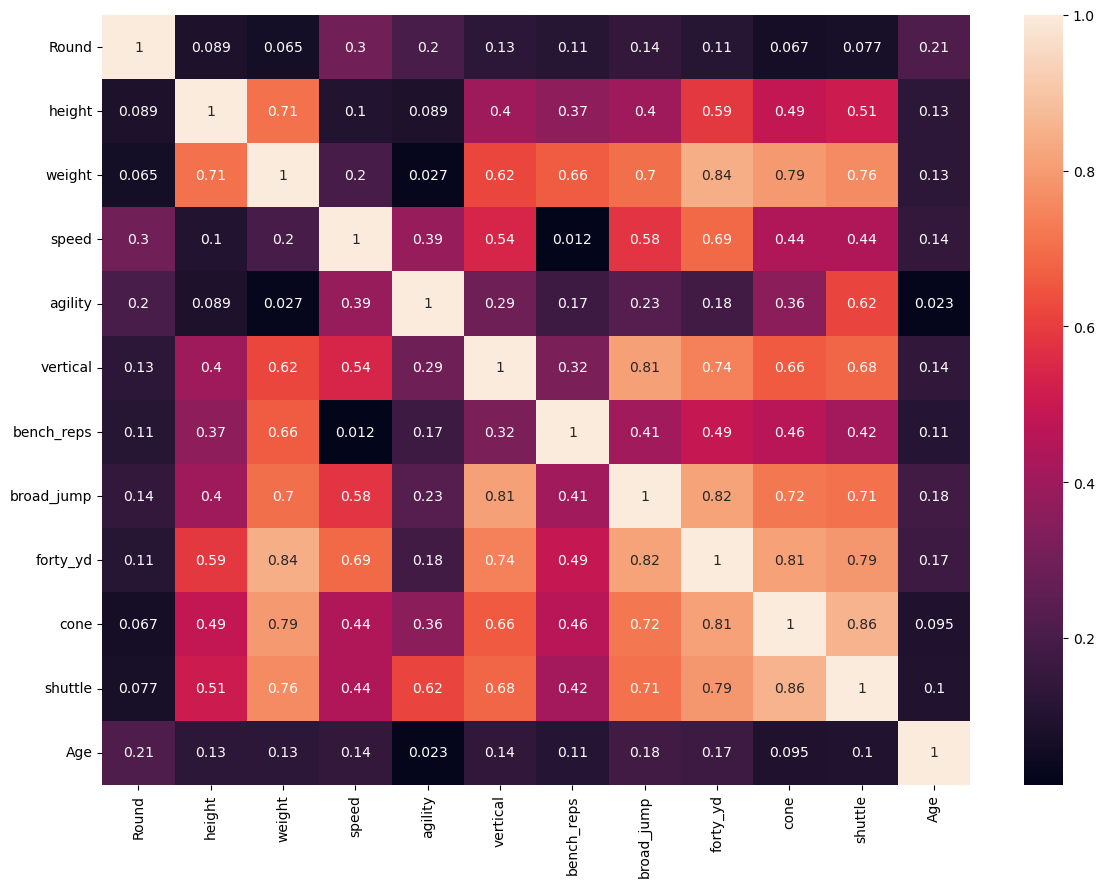

In [40]:
plt.figure(figsize=(14,10))
sns.heatmap(combine.corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\335694056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'QB'].corr().abs(),annot=True);


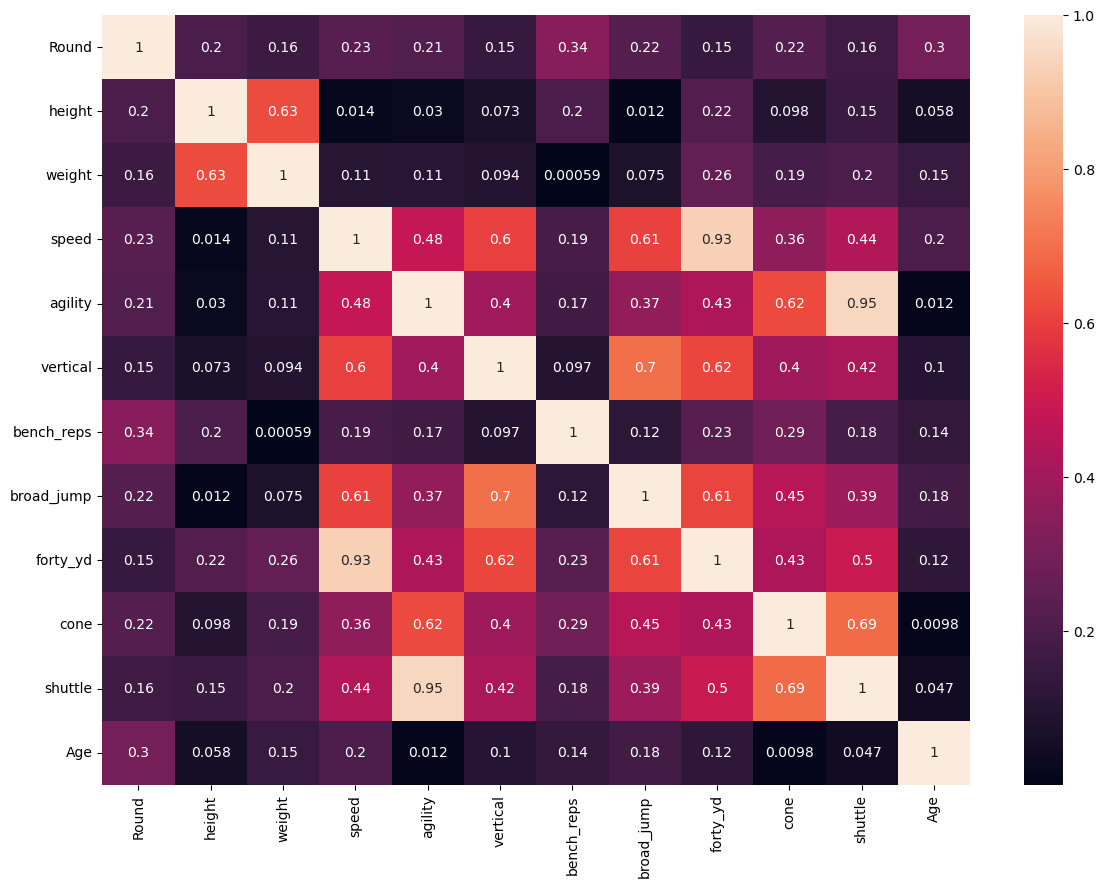

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'QB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\2060570500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'RB'].corr().abs(),annot=True);


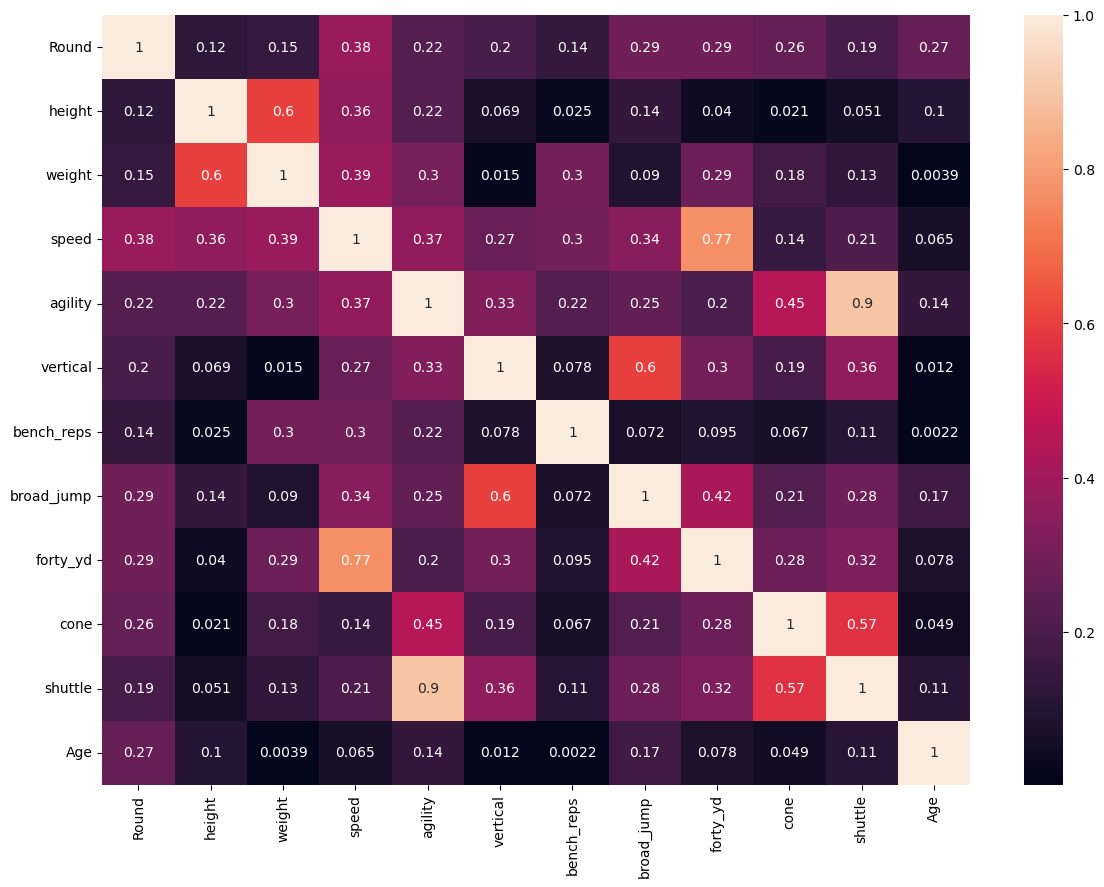

In [62]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'RB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\2538329814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'WR'].corr().abs(),annot=True);


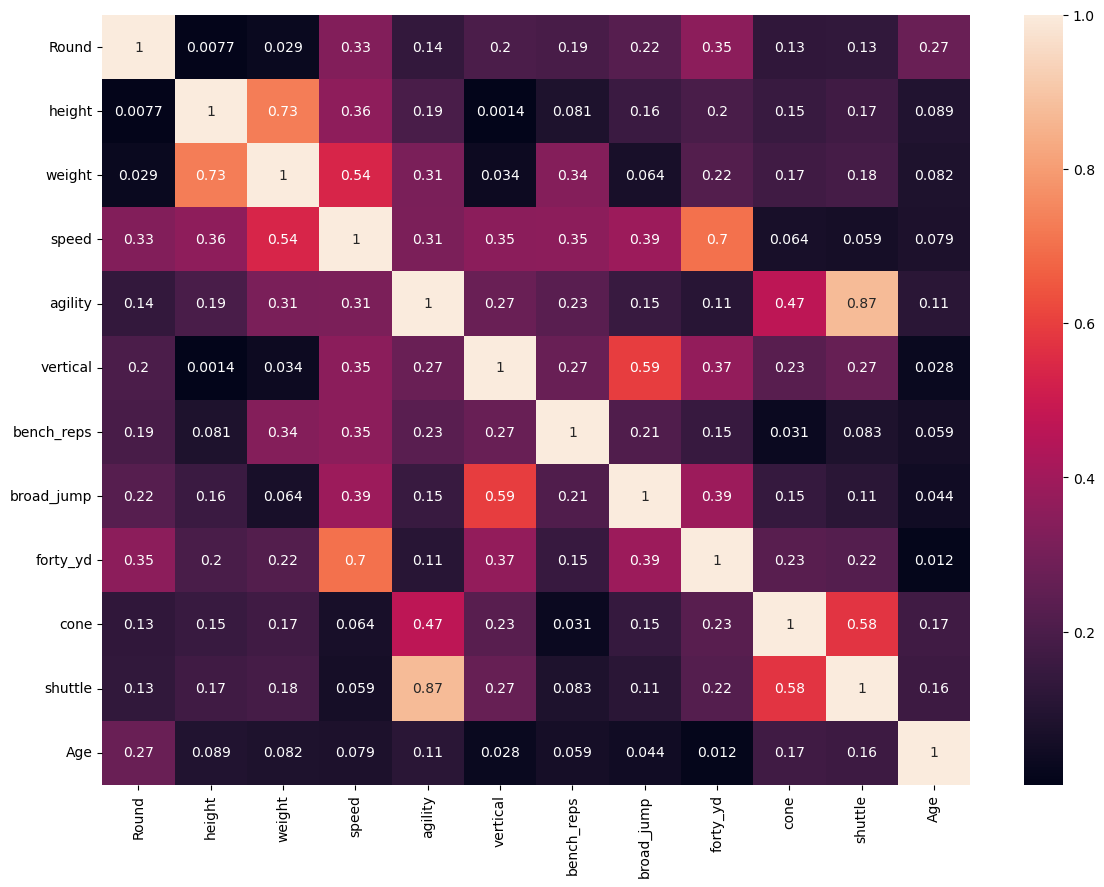

In [63]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'WR'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\4265659709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'TE'].corr().abs(),annot=True);


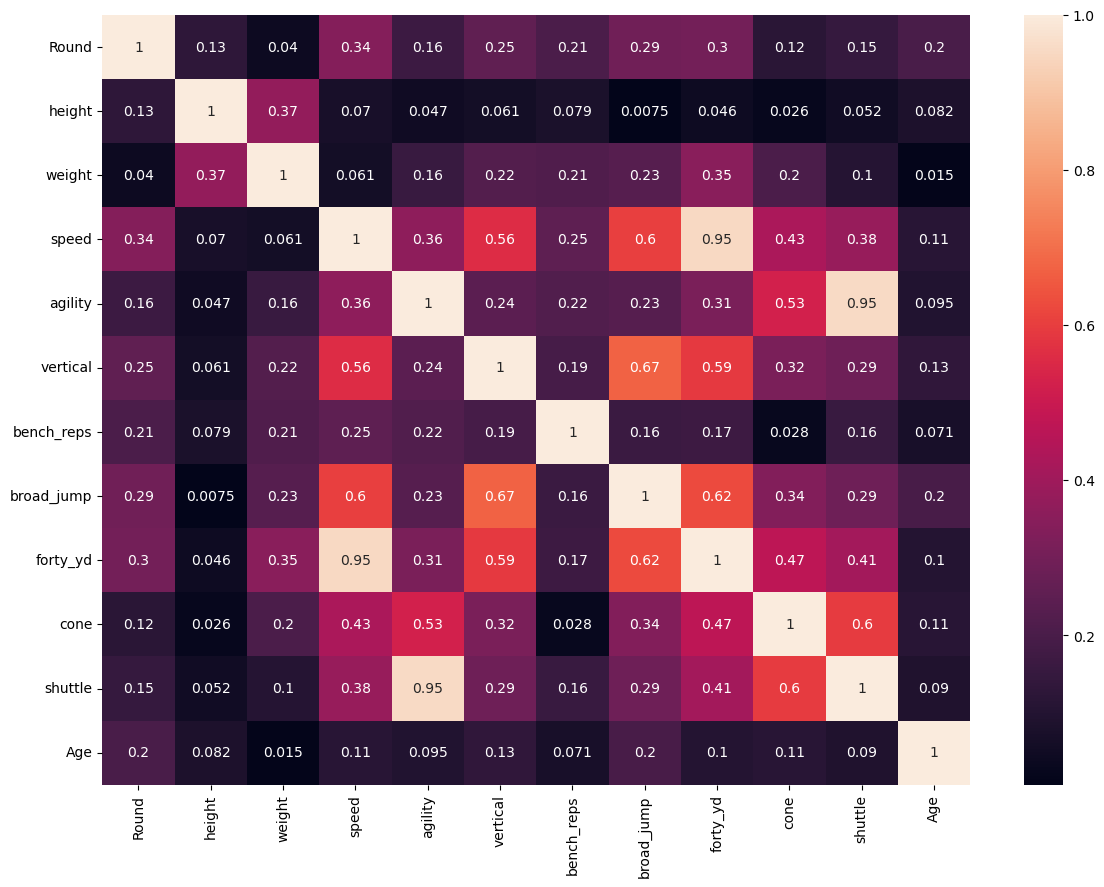

In [64]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'TE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\2779586782.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'OL'].corr().abs(),annot=True);


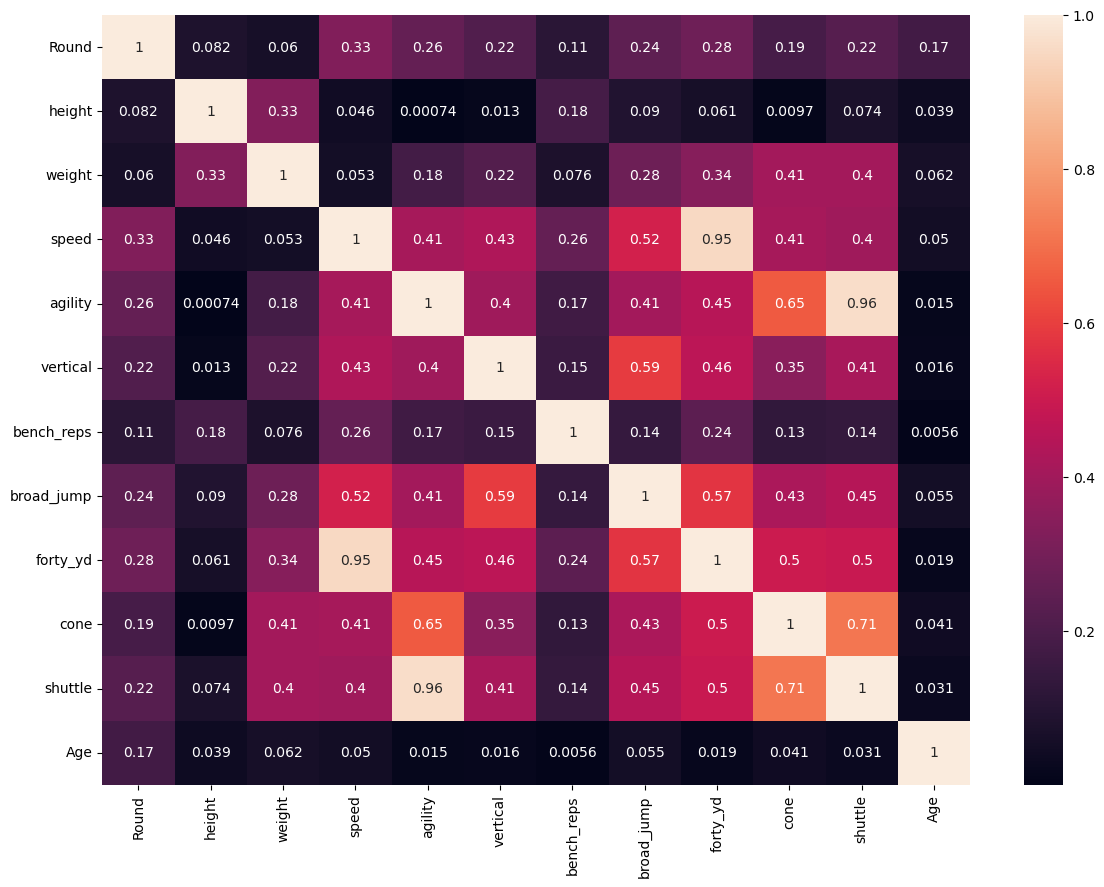

In [65]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'OL'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1482279189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DL'].corr().abs(),annot=True);


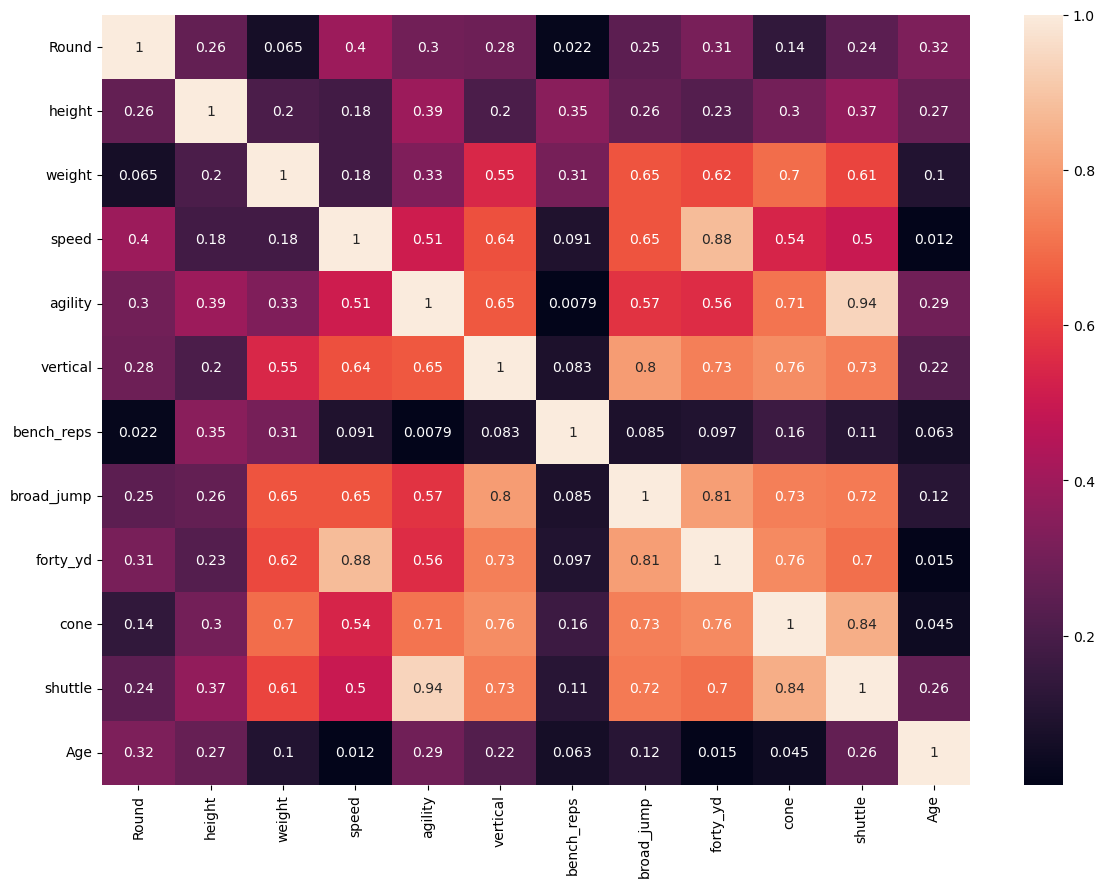

In [66]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DL'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\736944607.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DE'].corr().abs(),annot=True);


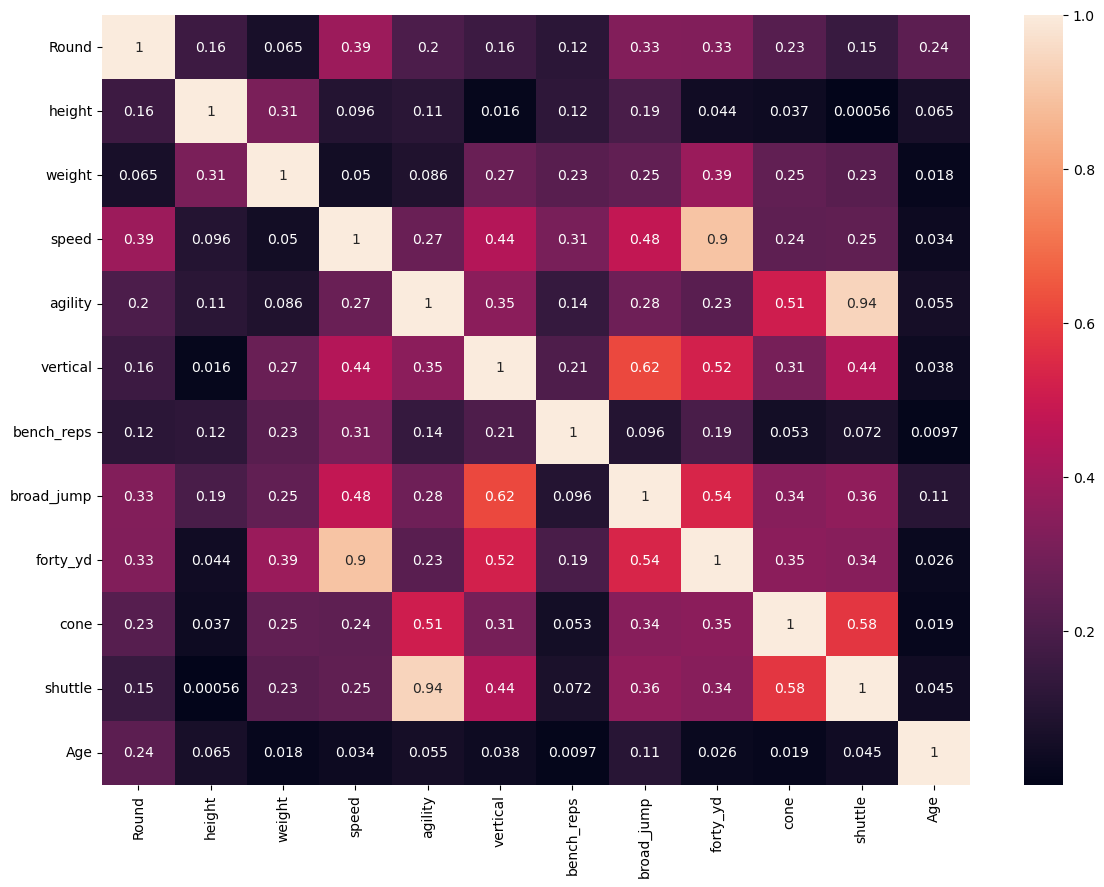

In [67]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\1040784863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'EDGE'].corr().abs(),annot=True);


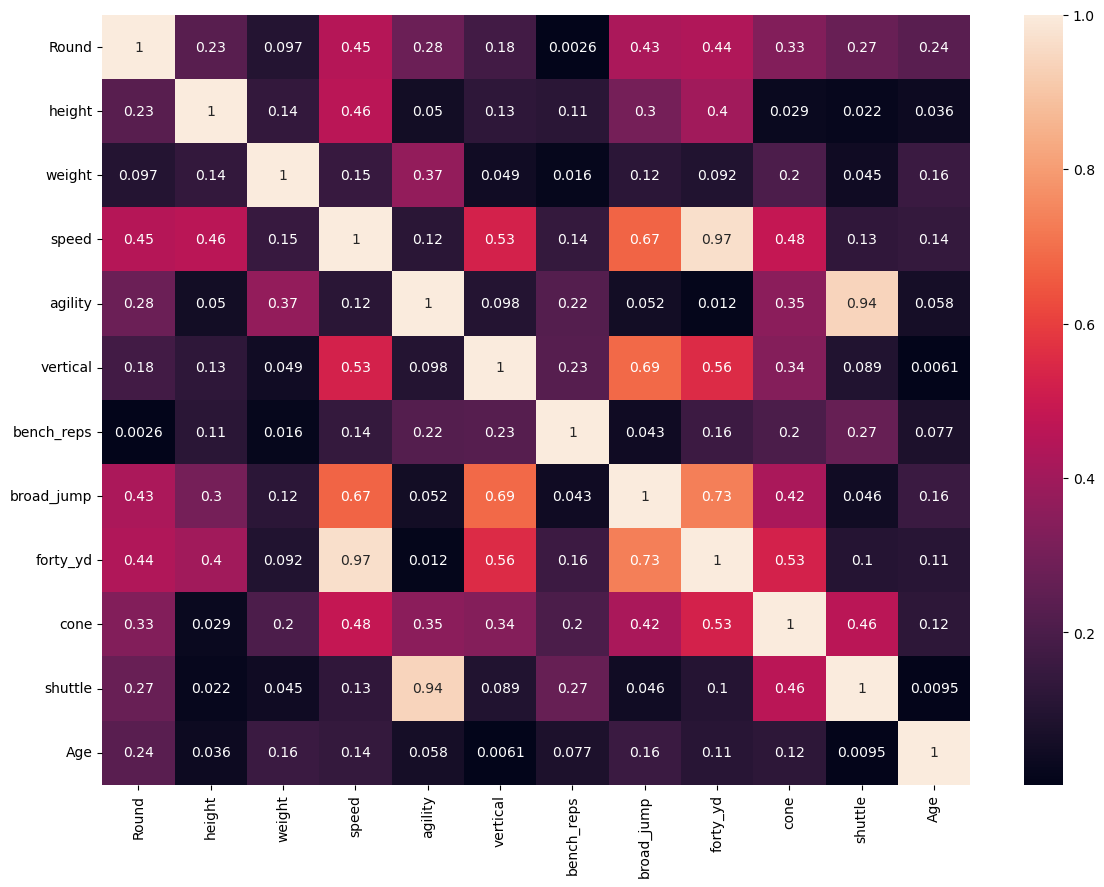

In [68]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'EDGE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\692367660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'LB'].corr().abs(),annot=True);


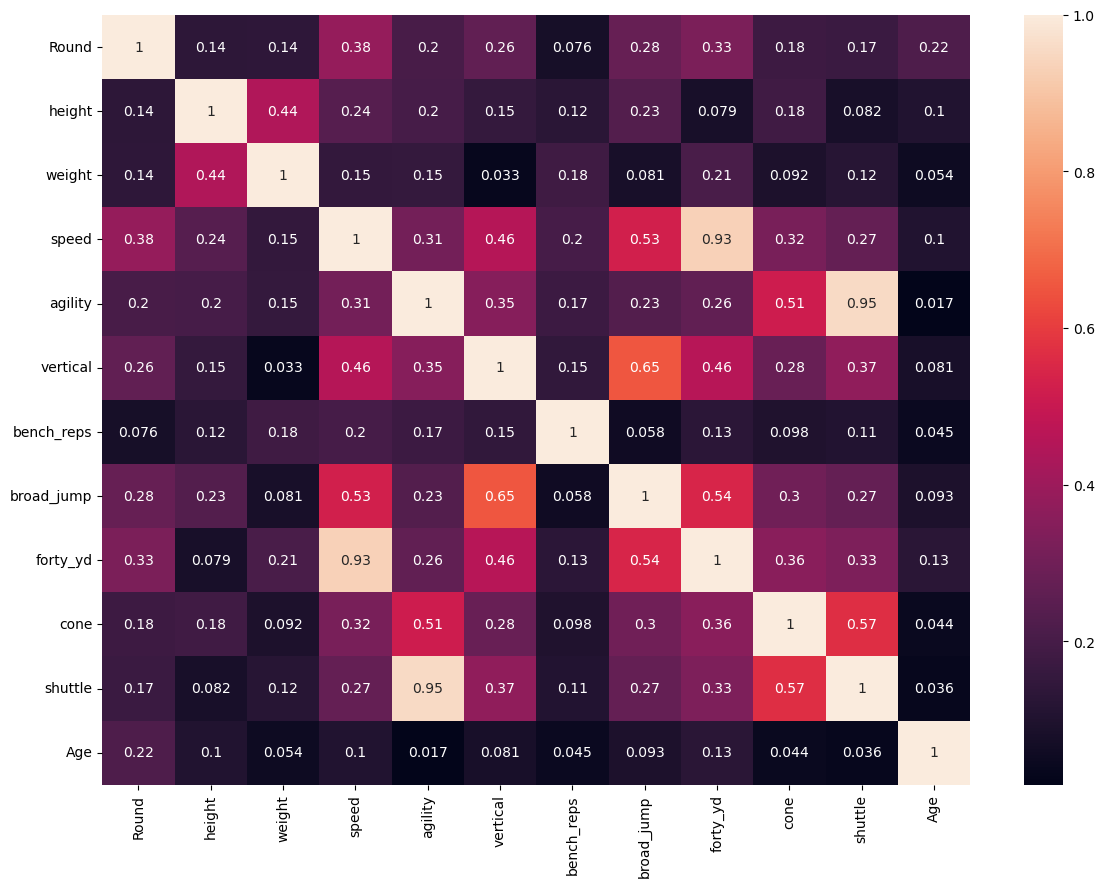

In [69]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'LB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\3658448629.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'CB'].corr().abs(),annot=True);


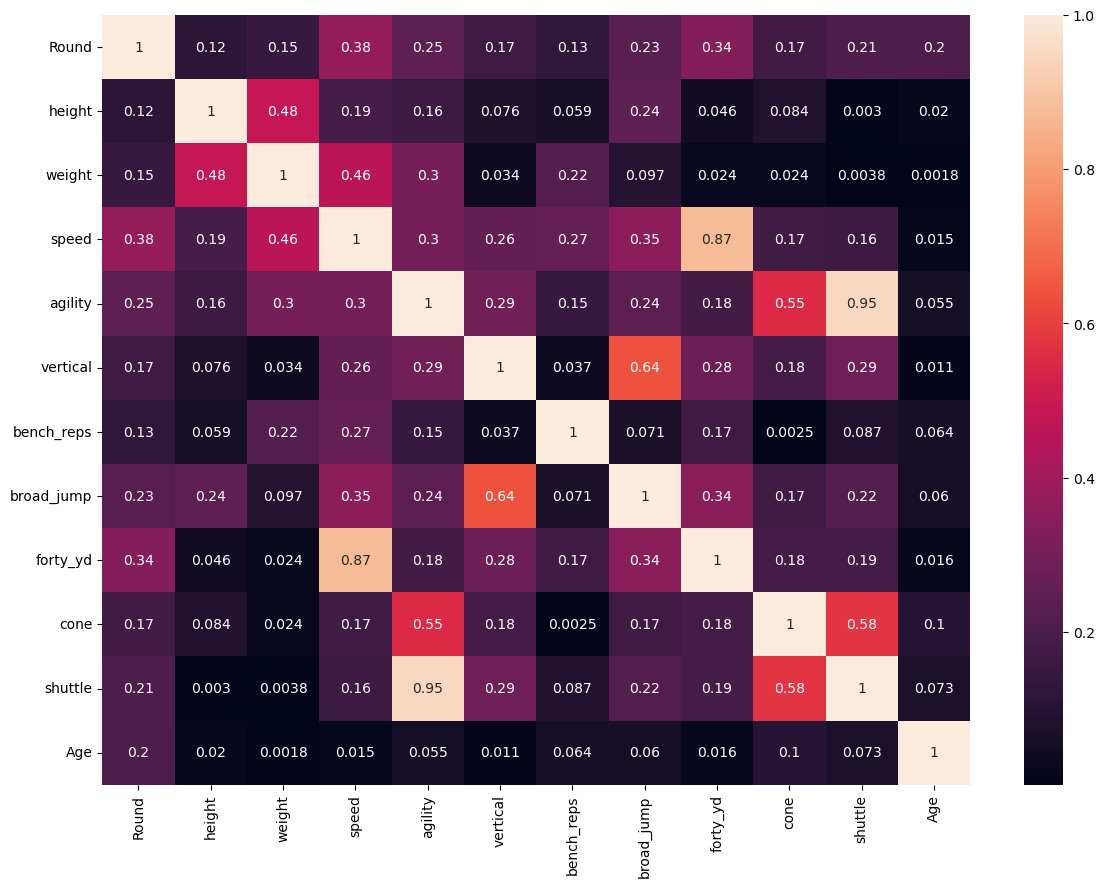

In [70]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'CB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\106728163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DB'].corr().abs(),annot=True);


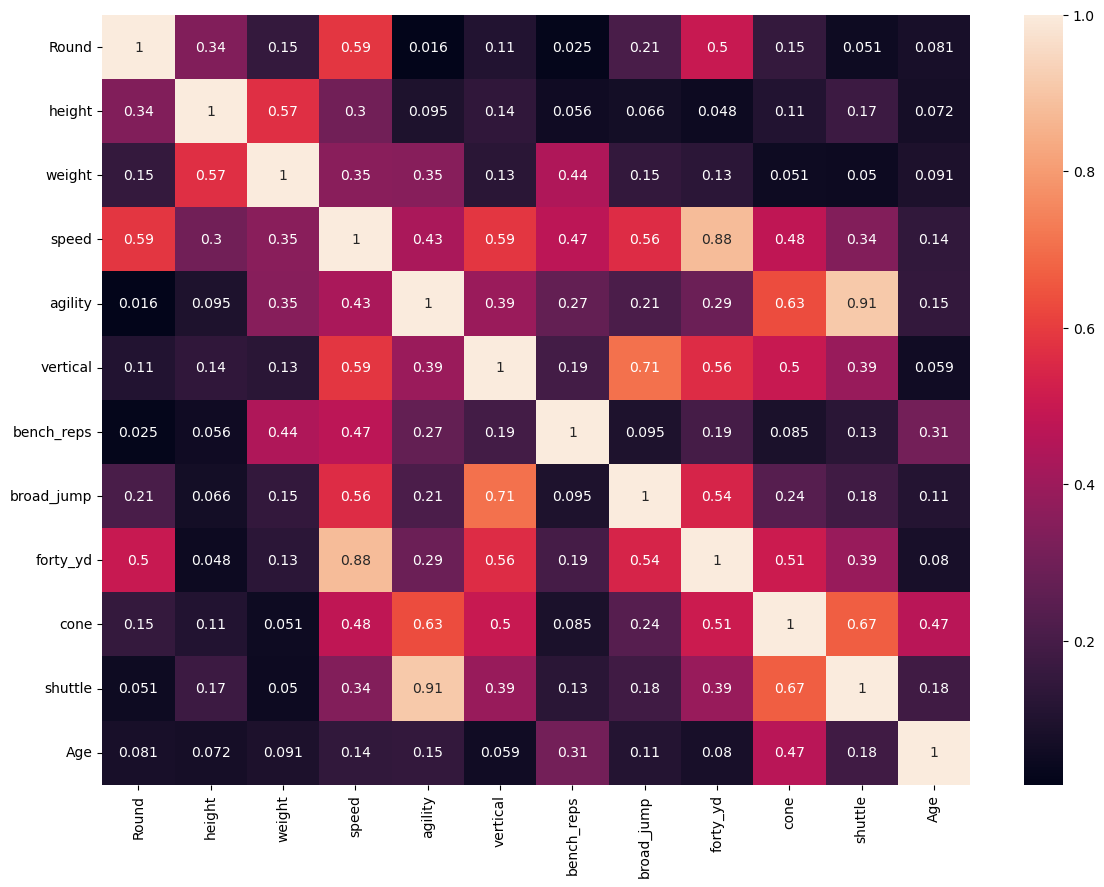

In [71]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_20456\159827862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'S'].corr().abs(),annot=True);


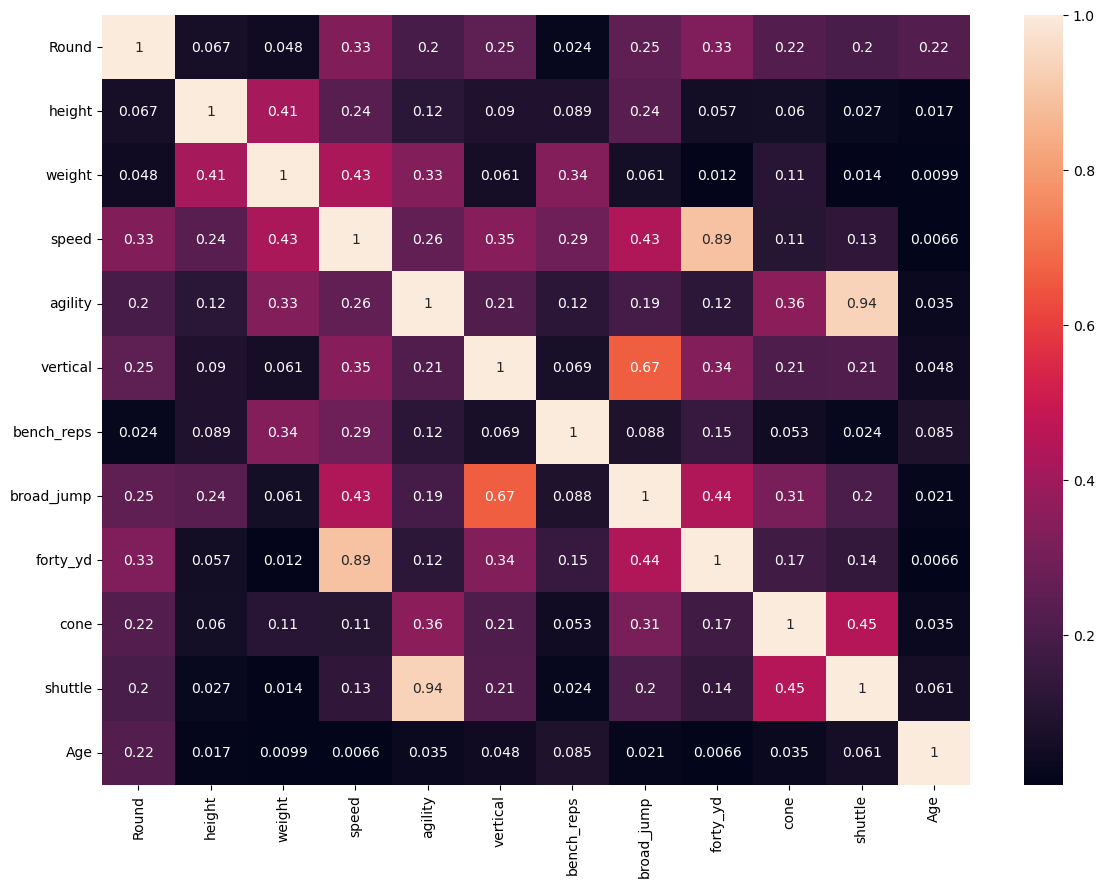

In [72]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'S'].corr().abs(),annot=True);